#**Pretrained Network**

Küçük görüntü veri setleri hakkında derin öğrenmeye yönelik yaygın ve etkili bir yaklaşım, önceden eğitilmiş (*pretrained*) bir ağdan yararlanmaktır.  

**VGG16**:
<p align="center">
<img src="https://i.hizliresim.com/Nd8Aav.png" width="750">
</p>

<p align="center">
<img src="https://i.hizliresim.com/uTrPZJ.png" width="750">
</p>



## **VGG16'yı Test Edelim;**

In [1]:
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import json
import os

model = VGG16(weights="imagenet", #ImageNet dataset icin egitilmis agirliklar
              include_top = True, #Dense Layer'i kullan.
              input_shape=(224, 224, 3))

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

`138,357,544` tane eğitilebilir parametre var. Bu parametreleri kaydetmek istersek, `138357544*4/1024/1024 = 527.79MB` boyutunda yer kaplar.  

Şimdi bu modeli bir test görüntüsü ile deneyelim;

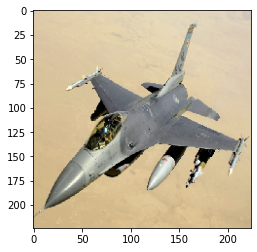

In [2]:
img_path="/content/drive/MyDrive/Works/Deep_Learning/VGG_16/test_img/warplane_test.png"

input1 = image.load_img(img_path, target_size=(224, 224))
plt.imshow(input1)
#Image'i numpy array'e donustur;
input = image.img_to_array(input1)

#Image'i networke uygula;
y = model.predict(input.reshape(1, 224, 224, 3))
# 1 olmasinin sebebi 1 adet image olmasi.

y'ye baktığımızda 1000 classın olasılıklarını göreceğiz.

1000 tane class olduğunu kontrol edelim;

In [3]:
print(y.shape)

(1, 1000)


`softmax` kullandığımızdan dolayı output olarak olasılıklar görüyoruz. y'nin içerisindeki olasılıkların toplamı 1.0 olmalıdır;

In [4]:
print("sum:", np.sum(y))

sum: 1.0000001


`np.argmax()` ile en yüksek olasılığın hangi classa ait olduğuna bakalım;

In [5]:
print("highest probability:", np.argmax(y))

highest probability: 895


`imagenet_class_index.json` dosyasından hangi class'ın neye ait olduğuna bakalım;

In [6]:
pred_index = np.argmax(y)
pred_perc = y[0][pred_index]*100
print("Predict percentage:", pred_perc)

Predict percentage: 84.1050386428833


In [7]:
json_path="/content/drive/MyDrive/Works/Deep_Learning/VGG_16/vgg16_class/imagenet_class_index.json"
with open(json_path) as json_file:
  labels = json.load(json_file)

In [8]:
#belirlenen etiket
id1, class1 = labels[str(pred_index)]
print("Class:", class1)

Class: warplane


Bu tarz networklerde sonuç olarak tek bir class'a bakılmaz, top 5, top 10 gibi sonuçlara bakılır;

`np.argsort()` bize tahmin edilen classların indexlerini küçükten büyüğe sıralayarak verir.

Top 5 class;
Class 1 = warplane 	% 84.10504
Class 2 = wing 	% 8.704448
Class 3 = airliner 	% 4.9688573
Class 4 = projectile 	% 0.9437183
Class 5 = missile 	% 0.90804464


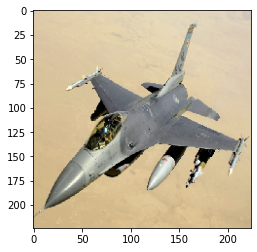

In [9]:
predicts = np.argsort(y[0])

top_5 = predicts[999:994:-1] #top-5 accuracy
print("Top 5 class;")

for count,ind in enumerate(top_5):
  id1, class1 = labels[str(ind)]
  print("Class",count+1,"=", class1,"\t%",
        (100*y[0][ind]).astype("float32"))
  
plt.imshow(input1);

**%84.1** olasılık ile savaş uçağı olduğunu tespit etti.

###**Görselleştirme;**

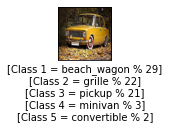

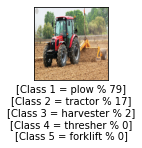

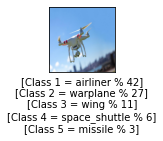

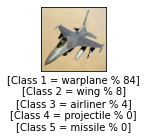

In [12]:
list_name=os.listdir('/content/drive/MyDrive/Works/Deep_Learning/VGG_16/test_img/')
test_dir='/content/drive/MyDrive/Works/Deep_Learning/VGG_16/test_img/'

for x,name in enumerate(list_name):
    path=test_dir+name
    input1=image.load_img(path,
                          target_size=(224,224))
    #Numpy dizisine dönüştür
    input=image.img_to_array(input1)
    #Görüntüyü ağa uygula
    y=model.predict(input.reshape(1,224,224,3))

    json_file = open('/content/drive/MyDrive/Works/Deep_Learning/VGG_16/vgg16_class/imagenet_class_index.json')
    labels=json.load(json_file)
    json_file.close()
    with open("/content/drive/MyDrive/Works/Deep_Learning/VGG_16/vgg16_class/imagenet_class_index.json") as dosya:
        etiketler=json.load(dosya)

    #top5 accuracy
    #kucukten buyuge dogru tahminleri sıraladı
    predicts=np.argsort(y[0])
    top_5=predicts[999:994:-1]#top5 accuracy
    #tahminleri yazdir
    fig = plt.figure()
    plt.subplot(1,4,x+1)
    plt.xticks([])
    plt.yticks([])
    top5_list=[]
    for count,ind in enumerate(top_5):
        id1,class1=labels[str(ind)]
        top5_list.append(['Class',count+1,'=',class1,"%",(100*y[0][ind]).astype('int')])
    plt.xlabel("{0}\n{1}\n{2}\n{3}\n{4}".format(* top5_list).replace(",", "").replace("'", ""))
    fig.tight_layout()
    #örnek görüntüyü göster
    plt.imshow(input1)

# **VGG16 ile Cat-Dog Verisetinin Eğitimi**


## **Feature Extraction**

Bu kez VGG16'nın Dense Layer'larını kullanmayıp kendimiz Dense Layer ekleyeceğiz.
Örnekte, modelin eğitimi iki şekilde gerçekleştirilecektir:


*   Birinci yaklaşımda, görüntülerin her biri VGG16 ağına uygulanacak
ve konvolüsyon katmanı çıkısında elde edilen vektörler
kaydedilecektir. Ardından bu veriler ikili sınıflandırma için yeniden
tanımlanmış yoğun katman (dense layer) için giriş olarak kullanılarak
yoğun katmanın eğitimi gerçekleştirilecektir.

*   İkinci yaklaşımda, VGG16 ağının yoğun katmanı çıkartılıp, ikili
sınıflandırma için tanımlanan yeni yoğun katman eklenecek.
Böylece model eğitimde bir bütün olarak kullanılacaktır. Ancak
konvolüsyon katmanının ağırlıkları dondurularak eğitim sırasında
değişmesi engellenecektir. Ayrıca, iyileştirme için çıkış katmanından
geriye doğru birkaç katman daha eğitime dahil edilerek başarıma
etkisi gösterilecektir.



### **1. Yöntem**

Birinci yaklaşımda, görüntülerin her biri VGG16 ağına uygulanacak ve konvolüsyon katmanı çıkısında elde edilen vektörler kaydedilecektir. Ardından bu veriler ikili sınıflandırma için yeniden tanımlanmış yoğun katman (dense layer) için giriş olarak kullanılarak yoğun katmanın eğitimi gerçekleştirilecektir.

In [13]:
!cp -r /content/drive/MyDrive/Works/Deep_Learning/CNN_Cat-Dog/data.zip .
!unzip -q data.zip
!rm data.zip

In [14]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [15]:
base_dir = "data-catdog/"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Önceden eğitilmiş ağı yükle;

In [16]:
conv_base = VGG16(weights="imagenet",
              include_top=False, #Dense Layer yok.
              input_shape = (150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Seçilen görüntüleri ağa uygulayıp ağ çıkışını `features` dizisine kaydet.  Görüntülerle ilgili etiketleri de `labels` dizisine kaydet

In [17]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode="binary")
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i+1) * batch_size] = features_batch
    labels[i*batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

Train, validation ve test görüntüleri, tanımladığımız `extract_features()` ile önceden eğitimli ağa uygulanır.

In [18]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
from keras import models
from keras import layers
from keras import optimizers

Eğiteceğimiz ağ sadece Dense katmanlardan oluşuyor. Conv2D katmanlarını hazır kullandığımız için eğiteceğimiz modelin içerisinde tekrar tanımlanmaz.

In [20]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"])

Önceden eğitimli konvolüsyon ağının çıkışındaki veriler Dense Layer katmanına uygulanarak ağı eğitmek için kullanılır.

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6886 - acc: 0.6083 - val_loss: 0.4399 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4444 - acc: 0.7983 - val_loss: 0.3618 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3638 - acc: 0.8392 - val_loss: 0.3366 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3114 - acc: 0.8787 - val_loss: 0.3202 - val_acc: 0.8560
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2810 - acc: 0.8849 - val_loss: 0.2972 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2592 - acc: 0.8919 - val_loss: 0.2901 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2621 - acc: 0.8982 - val_loss: 0.2811 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

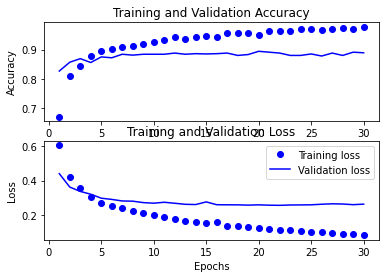

In [21]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

def plot_acc_loss(x):  
  acc = x.history["acc"]
  val_acc = x.history["val_acc"]
  loss = x.history["loss"]
  val_loss = x.history["val_loss"]
  print("acc =", acc[-1])
  print("val_acc = ", val_acc[-1])
  print("loss =", loss[-1])
  print("val_loss =", val_loss[-1])
  epochs = range(1, len(acc) + 1)
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  #fig.tight_layout()
  plt.show()
  
  

plot_acc_loss(history)

### **2. Yöntem**

**VGG16 Ağırlıklarının Eğitim Dışında Tutulması**  
*Training the model end to end with a frozen convolutional base*

İkinci yaklaşımda, VGG16 ağının yoğun katmanı çıkartılıp, ikili sınıflandırma için tanımlanan yeni yoğun katman eklenecek. Böylece model eğitimde bir bütün olarak kullanılacaktır. Ancak konvolüsyon katmanının ağırlıkları dondurularak eğitim sırasında değişmesi engellenecektir. Ayrıca, iyileştirme için çıkış katmanından geriye doğru birkaç katman daha eğitime dahil edilerek başarıma etkisi gösterilecektir.

Modeli tanımlarken konvolüsyon katmanı olarak VGG16 ağını kullanıyoruz.

In [22]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


`Non-trainable params: 0` olduğundan, modeli bu şekilde eğitirsek konvolüsyonları da eğitir.

Önceden eğitilmiş ağın parametrelerini kullanmak için donduruyoruz. Dondurmazsak VGG16 mimarisine ait parametreleri de eğitebiliriz. Ancak VGG16 daha önce 1.4 milyon görüntü ile eğitilmiş olduğu için, daha az veri ile eğittiğimiz ağın başarımını artırabilir. Daha önceki örnekte de bu ağı kullanmıştık ve eğitimden önce görüntüleri önce VGG16’dan geçirmiştik. Bu örnekte VGG16’yı da model yapısına eklediğimiz için buna gerek yok. Bu örnekte ayrıca veri zenginleştirme de yapılarak başarım artışı elde edilecektir.

In [23]:
conv_base.trainable=False #conv_base katmaninin agirliklarini dondurur.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Burada dikkat etmemiz gereken nokta;

```
Non-trainable params: 14,714,688
```



In [24]:
train_datagen = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), #Resizes all images to 150 × 150
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 20s 190ms/step - loss: 0.6420 - acc: 0.6225 - val_loss: 0.4576 - val_acc: 0.8090
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.4843 - acc: 0.7927 - val_loss: 0.3839 - val_acc: 0.8340
Epoch 3/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4481 - acc: 0.7917 - val_loss: 0.3487 - val_acc: 0.8560
Epoch 4/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4191 - acc: 0.8060 - val_loss: 0.3296 - val_acc: 0.8650
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3968 - acc: 0.8174 - val_loss: 0.3096 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3901 - acc: 0.8291 - val_loss: 0.3063 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3658 - acc: 0.8419 - val_loss: 0.2920 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 1

acc = 0.8700000047683716
val_acc =  0.8939999938011169
loss = 0.2777874171733856
val_loss = 0.25474610924720764


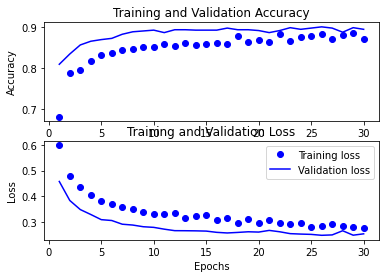

In [25]:
plot_acc_loss(history)

### **Fine Tuning**

Önceden eğitilmiş ağ üzerinde ince ayar.


<p align="center">
<img src="https://i.hizliresim.com/6Iwg4E.png">
</p>

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Ağ içerisindeki katman isimlerini `conv_base.layers` ile al.  
Eğer isim beşinci bloğa aitse `set_trainable=True` yapılarak blok eğitime dahil edilir.

In [27]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True #5. katmandan sonrakileri trainable yap.
  else:
    layer.trainable = False

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 21s 201ms/step - loss: 0.3323 - acc: 0.8567 - val_loss: 0.2250 - val_acc: 0.9070
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.2480 - acc: 0.8979 - val_loss: 0.2987 - val_acc: 0.8750
Epoch 3/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2214 - acc: 0.9193 - val_loss: 0.1975 - val_acc: 0.9150
Epoch 4/100
100/100 [==============================] - 20s 197ms/step - loss: 0.2161 - acc: 0.9026 - val_loss: 0.1989 - val_acc: 0.9200
Epoch 5/100
100/100 [==============================] - 20s 197ms/step - loss: 0.2042 - acc: 0.9213 - val_loss: 0.2380 - val_acc: 0.9100
Epoch 6/100
100/100 [==============================] - 20s 197ms/step - loss: 0.2131 - acc: 0.9136 - val_loss: 0.1983 - val_acc: 0.9200
Epoch 7/100
100/100 [==============================] - 19s 194ms/step - loss: 0.1852 - acc: 0.9301 - val_loss: 0.2309 - val_acc: 0.9100
Epoch 8/100
100/100 [===========================

acc = 0.9909999966621399
val_acc =  0.9309999942779541
loss = 0.02035638689994812
val_loss = 0.40566104650497437


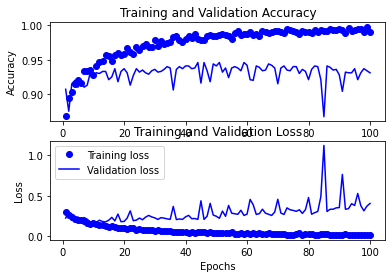

In [29]:
plot_acc_loss(history)

Test verilerinde model başarımını ölçelim;

In [30]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9350000023841858
